## Mushrooms Classification

In [41]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.shape

(8124, 23)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [39]:
import seaborn as sns

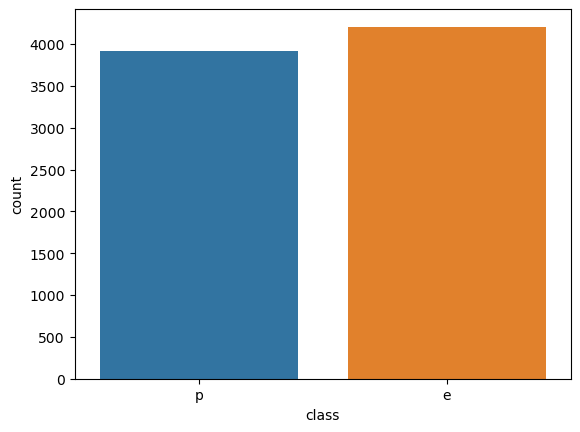

In [42]:
sns.countplot(df["class"]);

In [13]:
x=df.drop('class',axis=1)
y=df['class']

In [14]:
x=pd.get_dummies(x,drop_first=True)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x,y)

DecisionTreeClassifier()

In [20]:
tahmin=d.predict(x)

In [21]:
accuracy_score(tahmin,y)

1.0

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [23]:
tahmin1=g.predict(x)
tahmin2=b.predict(x)

In [24]:
accuracy_score(tahmin1,y)

0.9458394879369768

In [25]:
confusion_matrix(tahmin1,y)

array([[3771,    3],
       [ 437, 3913]], dtype=int64)

In [26]:
print(classification_report(tahmin1,y))

              precision    recall  f1-score   support

           e       0.90      1.00      0.94      3774
           p       1.00      0.90      0.95      4350

    accuracy                           0.95      8124
   macro avg       0.95      0.95      0.95      8124
weighted avg       0.95      0.95      0.95      8124



In [27]:
accuracy_score(tahmin2,y)

0.9416543574593796

In [28]:
confusion_matrix(tahmin2,y)

array([[4166,  432],
       [  42, 3484]], dtype=int64)

In [29]:
print(classification_report(tahmin2,y))

              precision    recall  f1-score   support

           e       0.99      0.91      0.95      4598
           p       0.89      0.99      0.94      3526

    accuracy                           0.94      8124
   macro avg       0.94      0.95      0.94      8124
weighted avg       0.95      0.94      0.94      8124



In [32]:
from sklearn.svm import SVC
s=SVC()
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [35]:
pred=s.fit(x_train,y_train).predict(x_test)

In [36]:
confusion_matrix(y_test,pred)

array([[843,   0],
       [  0, 782]], dtype=int64)